# Machine learning with decision trees

## Try me
 [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ffraile/operations-research-notebooks/blob/main/docs/source/Decision%20Theory/tutorials/Decision_trees_machine_learning_with_SKLearn.ipynb)[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ffraile/operations-research-notebooks/main?labpath=docs%2Fsource%2FDecision%20Theory%2Ftutorials%2FDecision_trees_machine_learning_with_SKLearn.ipynb)

In this notebook we are going to train a decision tree to solve a classification problem in Python.

## Problem definition
The goal is to train a model to get the category of a wine according to a set of physicochemical properties (e.g. alcohol percentage, color intensity and hue, or flavonoids).
Imagine that the categories have been assigned by our customers on a given number of wines (e.g. they have determined which wines that are awesome, which wines are ok, or which ones are only drinkable). Then, with such a model, given a new wine, we could predict its category based on the physicochemical properties of the wine provided by a physicochemical test.

The objective is then to train a model to predict the category of the wine based on 13 different properties of wine. 

## Load data
We are going to use a dataset provided by [SKlearn](https://scikit-learn.org/stable/datasets/toy_dataset.html). The dataset contains 177 samples of physicochemical properties of different types of  wines, classified into three different classes, class 1, class 2, and class 3.

The dataset in SKLearn is loaded with the function ```load_wine```. The object returned contains the following properties:

- ```data```: A 2D Numpy array where each row is a different physicochemical test performed over a different wine (that is, each row represents the properties of a wine) and each column contains the data of a specific property. 
- ```target```: A 1D Numpy (column vector) array where each row represents the category of the corresponding wine
- ```feature_names```: The names of the columns in ```data```
- ```target_names```: The names of the wine categories

You can check the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) for further details. 

Let´s load the data into a Pandas dataframe so that we can explore its properties:

In [ ]:
from sklearn.datasets import load_iris, load_wine
import pandas as pd

# Load the wine dataset
wine_data = load_wine()
# Let´s create a dataframe to explore the data
df_wine = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
display(df_wine)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


## Understanding the data
Now, let us explore the data so that we understand the dataset better. First, we use the ```describe()``` method of the pandas dataframe to show some statistics of each class:

In [ ]:
from IPython.core.display import Markdown
target_classes = range(0, 3)

# For each class
for target_class in target_classes:
  # Show some markdown to introduce the table
  display(Markdown('### ' + wine_data.target_names[target_class]))
  display(Markdown('Find below the statitiscal details of the physicochemical properties of the class'))
  
  # Mask the rows of the class
  class_mask = wine_data.target == target_class
  class_df = df_wine.iloc[class_mask]
  
  # Display the resulting dataframe
  display(class_df.describe())

###class_0

Find below the statitiscal details of the physicochemical properties of the class

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
std,0.462125,0.688549,0.227166,2.546322,10.498949,0.338961,0.397494,0.070049,0.412109,1.238573,0.116483,0.357077,221.520767
min,12.850000,1.350000,2.040000,11.200000,89.000000,2.200000,2.190000,0.170000,1.250000,3.520000,0.820000,2.510000,680.000000
25%,13.400000,1.665000,2.295000,16.000000,98.000000,2.600000,2.680000,0.255000,1.640000,4.550000,0.995000,2.870000,987.500000
50%,13.750000,1.770000,2.440000,16.800000,104.000000,2.800000,2.980000,0.290000,1.870000,5.400000,1.070000,3.170000,1095.000000
75%,14.100000,1.935000,2.615000,18.700000,114.000000,3.000000,3.245000,0.320000,2.090000,6.225000,1.130000,3.420000,1280.000000
max,14.830000,4.040000,3.220000,25.000000,132.000000,3.880000,3.930000,0.500000,2.960000,8.900000,1.280000,4.000000,1680.000000


###class_1

Find below the statitiscal details of the physicochemical properties of the class

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
std,0.537964,1.015569,0.315467,3.349770,16.753497,0.545361,0.705701,0.123961,0.602068,0.924929,0.202937,0.496573,157.211220
min,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.570000,0.130000,0.410000,1.280000,0.690000,1.590000,278.000000
25%,11.915000,1.270000,2.000000,18.000000,85.500000,1.895000,1.605000,0.270000,1.350000,2.535000,0.925000,2.440000,406.500000
50%,12.290000,1.610000,2.240000,20.000000,88.000000,2.200000,2.030000,0.370000,1.610000,2.900000,1.040000,2.830000,495.000000
75%,12.515000,2.145000,2.420000,22.000000,99.500000,2.560000,2.475000,0.430000,1.885000,3.400000,1.205000,3.160000,625.000000
max,13.860000,5.800000,3.230000,30.000000,162.000000,3.520000,5.080000,0.660000,3.580000,6.000000,1.710000,3.690000,985.000000


###class_2

Find below the statitiscal details of the physicochemical properties of the class

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.44750,1.153542,7.396250,0.682708,1.683542,629.895833
std,0.530241,1.087906,0.184690,2.258161,10.890473,0.356971,0.293504,0.12414,0.408836,2.310942,0.114441,0.272111,115.097043
min,12.200000,1.240000,2.100000,17.500000,80.000000,0.980000,0.340000,0.17000,0.550000,3.850000,0.480000,1.270000,415.000000
25%,12.805000,2.587500,2.300000,20.000000,89.750000,1.407500,0.580000,0.39750,0.855000,5.437500,0.587500,1.510000,545.000000
50%,13.165000,3.265000,2.380000,21.000000,97.000000,1.635000,0.685000,0.47000,1.105000,7.550000,0.665000,1.660000,627.500000
75%,13.505000,3.957500,2.602500,23.000000,106.000000,1.807500,0.920000,0.53000,1.350000,9.225000,0.752500,1.820000,695.000000
max,14.340000,5.650000,2.860000,27.000000,123.000000,2.800000,1.570000,0.63000,2.700000,13.000000,0.960000,2.470000,880.000000


The statistical information is useful, but it is impossible or in most cases really hard to determine manually the rules to separate the different classes in each of the 19 properties in the data set. Just to certify this, let´s display some of the data using Pyplot:

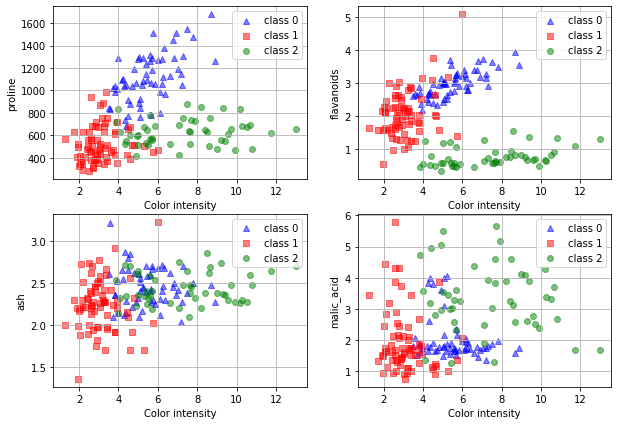

In [ ]:
from matplotlib import pyplot as plt

FIG_SIZE = (10, 7)
# Create figure 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=FIG_SIZE)

# Get some of the columns
columns = ['proline', 'flavanoids', 'ash', 'malic_acid'] 

# Now, we define some styles and colors for the 3 target classes
target_classes = range(0, 3)
colors = ("blue", "red", "green")
markers = ("^", "s", "o")

#Let´s iterate on the target classes, so that we plot the values in 
# of each with different colors
for target_class, color, marker in zip(target_classes, colors, markers):
  # The color intensity is going to be the x axis in every plot:
  x_data = df_wine['color_intensity'][wine_data.target == target_class]
  # Now let´s get 4 different columns to plot in each of the subplots
  for idx in range(0,4):
    # Get the axes in which we are going to plot our data
    ax = axes[idx//2][idx%2]
    col = columns[idx]
    
    # Let´s get the data, similar as we did for the x axis
    y_data = df_wine[columns[idx]][wine_data.target == target_class]
    
    # Plot the data in the corresponding subplot
    ax.scatter(
        x=x_data,
        y=y_data,
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )
    ax.set_xlabel("Color intensity")
    ax.set_ylabel(columns[idx])
    ax.legend(loc="upper right")
    ax.grid()

In the plot, we see 4 different properties (proline, flavanoids, ash, malic acid) against the color intensity. We can see that the data is not linearly separable in any of them, and this is only 4 out of $13^2$ possible pairs of parameters, it is clear that is unfeasible to come up with some simple rules to separate the datasets easily.
But can we get the the decision tree to separate the data in the three classes automatically, using a decision tree? Let´s find out in the following section. 

## Training a decision tree to classify the dataset
### Dividing the dataset into training and validation data
The first step is to divide the dataset into the training dataset and the validation dataset. With this step, we want to ensure that we leave some portion of the dataset so that we can validate our model. 
In the code below, the size of the data left out to validate the model is around 30% of the available data. 

We use the function ```train_test_split``` to split the data between the training data set and the validation dataset.  (```text_size=0.3```).

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine_data.data, wine_data.target, test_size = 0.3,random_state=42)

Note that the ```train_test_split``` function returns four values:

- ```X_train```: This Numpy array contains the features in the training data set, each row corresponds to one of the tests in the training data, and each column to a differnet feature (physicochemical property).
- ```y_train```: These are the categories of the wines in the training dataset.
- ```X_test```: This Numpy array contains the features in the test data set, similar to X_train.
- ```y_test```: And these are the categories of the wines in the test dataset. 

[Here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split) are the full details of the ```train_test_split``` function.


## Train the model
We are going to train our model, using the training data. We only need to create an instance of a ```DecisionTreeClassifier``` class, and use the class method ```fit``` passing the trainining data: 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(random_state=0)
clf_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

All the details of the DecisionTreeClassifier class can be found in [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier).

## Validate the decision tree
### Checking the accuracy
Ok, once that we have trained our model, let us test its, [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score). We are going to use some built-in functions provided in SKLearn. The first one, ```accuracy_score``` computes the accuracy of a model, passing as parameters, the real categories and the predicted categories. So let´s predict the categories in the test data set and get teh accuracy score: 

In [ ]:
from sklearn.metrics import accuracy_score

# Use the method predict to predict the category of the wines in the test dataset
y_predict = clf_model.predict(X_test)

# Calculate the accuracy with accurate_score, using the real categories in the test dataset
# and the predicted categories                         
accuracy_score(y_test,y_predict)


0.9629629629629629

### Represent the Confusion matrix
SKLearn also allow us to display the confusion matrix given a set of real categories and a set of predicted categories, with the function ```confusion_matrix``` (see docs [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)), and display the confusion matrix with ```ConfusionMatrixDisplay``` (see docs [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)):

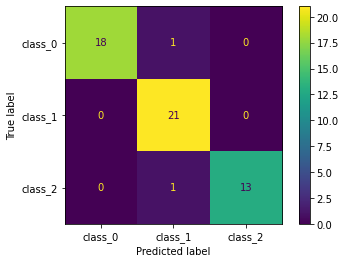

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=wine_data.target_names)
disp.plot()
plt.show()

### Render the decision tree
Finally, let´s render the decision tree using Graphviz and the provided class method ```export_graph_viz```. 
Read the docs [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html).

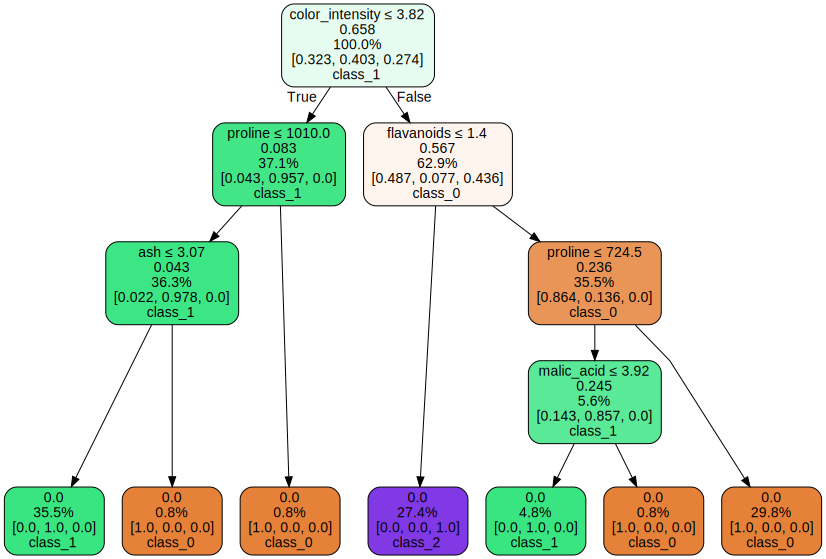

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf_model,
                                out_file=None, 
                      feature_names=wine_data.feature_names,  
                      class_names=wine_data.target_names,  
                      filled=True,
                      label='none',
                      leaves_parallel=True,
                      proportion=True,
                      rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

graph


## Testing the model
You are now ready to test the model! You only need to create an array with where the Physicochemical properties are added in the right order:

| Physicochemical properties   | Array position | Example |
|:-----------------------------|---------------:|--------:|
| alcohol                      |              0 |    15.0 |
| malic_acid                   |              1 |     1.7 |
| ash                          |              2 |     2.1 |
| alcalinity_of_ash            |              3 |    15.0 |
| magnesium                    |              4 |     105 |
| total_phenols                |              5 |     2.3 |
| flavanoids                   |              6 |    1.32 |
| nonflavanoid_phenols         |              7 |     0.5 |
| proanthocyanins              |              8 |     2.0 |
| color_intensity              |              9 |     3.9 |
| hue                          |             10 |     1.1 |
| od280/od315_of_diluted_wines |             11 |     3.0 |
| proline                      |             12 |     890 |

The following code cell shows the class of a wine that has the physicochemical properties in the example:


In [ ]:
example = [[15.0, 1.7, 2.1, 15.0, 105, 2.3, 1.32, 0.5, 2.0, 3.9, 1.1, 3.0, 890]]

## Questions for analysis
1. Now that you have trained the model, you can use the ```predict``` method to get the category of a new wine. Use this method to get the category of the wonderful Casa Quemada (CQ) from Viña Elena´s winerie, given its physicochemical properties: 

|   Physicochemical properties |  CQ    |
|:-----------------------------|-------:|
| alcohol                      |  14.38 |
| malic_acid                   |   1.83 |
| ash                          |   2.36 |
| alcalinity_of_ash            |  17.2  |
| magnesium                    | 104    |
| total_phenols                |   2.42 |
| flavanoids                   |   1.39 |
| nonflavanoid_phenols         |   0.42 |
| proanthocyanins              |   1.97 |
| color_intensity              |   3.84 |
| hue                          |   1.23 |
| od280/od315_of_diluted_wines |   2.87 |
| proline                      | 990    |

In [ ]:
# Enter in this array the physicochemical properties of the wine you would like to test, in order and using commas to separate the values
cq = [[]]
cq_class = clf_model.predict(cq)
cq_class


How good is the wine? Now look at the decision rules in the tree and solve the tree manually. Do you get the same result?

2. The confusion matrix shows the errors made by the model, whereas the accuracy is just a metric of the number of errors. Imagine that you use the different categories to guide your marketing policies, and that you will invest more money in the marketing of wines you expect will have better ratings (being class 2 the category of best rated wines) more than in wines with lower expectations. Do you think that the confusion matrix provides valuable information for analysis?

3. The accuracy is just one out of different metrics used to evaluate machine learning models. Another interesting metric is called precision, and is also implemented in SKLearn. You can check the docs in this [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score).  Based on your response to the previous question, do you think that the precision is a relevant metric in this use case scenario?

4. Run the experiment again with different sizes of the test data (e.g. 20% and 40%). Recall the concepts of overfitting and underfitting and note what happens with the accuracy. What are your conclusions?

5. Look now to the right hand of the decision tree. Looking to the left, it would be interesting to plot the proline against the malic acid. Check the code cells used to render some of the properties against the color intensity to plot the proline against the malic acid for a) all wines, b) only wines in classes 0 and 1 c) wines where the color intensity is greater than 3.82 and flavanoids greater than 1.4.  

6. SKLearn has other [datasets](https://scikit-learn.org/stable/datasets.html) you can use to step up your machine learning skils. Do you dare to train a model for a different training dataset?
